## 1. MULTI-ARMED BANDITS

### 1.1 Make several plots of the Beta-density to illustrate the properties
#### 1.1.1 Make several plots of the Beta-density to illustrate the properties
i) uniform distribution when a = b = 1

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return (n*factorial(n-1))

def beta_x(x, alpha, beta):
    return factorial(alpha + beta -1)/ (factorial(alpha-1)*factorial(beta-1)) * math.pow(x, alpha-1) * math.pow(1-x, beta-1)

def beta_plot(alpha, beta):
    y = []
    x=np.arange(0,1.01,0.01)
    for i in x:
        y.append(beta_x(i, alpha, beta))
    #plt.plot(x,y)
    #plt.show()
    return y

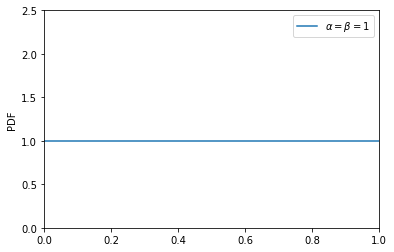

In [2]:
x=np.arange(0,1.01,0.01)
y1 = beta_plot(1,1)
l1, = plt.plot(x, y1, label = 'line')
plt.xlim((0, 1))
plt.ylim((0, 2.5))
plt.ylabel('PDF')
plt.legend(handles = [l1], labels = [r'$\alpha = \beta = 1$'], loc = 'best')
plt.savefig('11.png')
plt.show()

ii) 1.1.2 symmetric about x = 1/2 when a = b

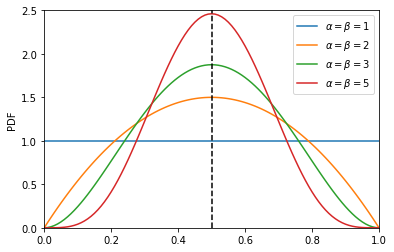

In [3]:
x=np.arange(0,1.01,0.01)
y1 = beta_plot(1,1)
y2 = beta_plot(2,2)
y3 = beta_plot(3,3)
y4 = beta_plot(5,5)
l1, = plt.plot(x, y1, label = 'line')
l2, = plt.plot(x, y2, label = 'line')
l3, = plt.plot(x, y3, label = 'line')
l4, = plt.plot(x, y4, label = 'line')
xposition = [0.5]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.xlim((0, 1))
plt.ylim((0, 2.5))
plt.ylabel('PDF')
plt.legend(handles = [l1, l2, l3, l4], labels = [r'$\alpha = \beta = 1$', r'$\alpha = \beta = 2$', r'$\alpha = \beta = 3$', r'$\alpha = \beta = 5$'], loc = 'best')
plt.savefig('12.png')
plt.show()

iii) 1.1.3 right-leaning when a>b

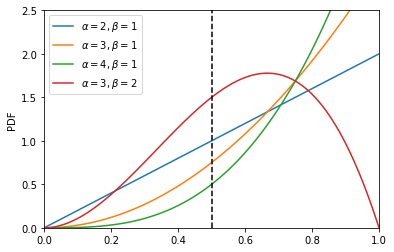

In [4]:
x=np.arange(0,1.01,0.01)
y1 = beta_plot(2,1)
y2 = beta_plot(3,1)
y3 = beta_plot(4,1)
y4 = beta_plot(3,2)
l1, = plt.plot(x, y1, label = 'line')
l2, = plt.plot(x, y2, label = 'line')
l3, = plt.plot(x, y3, label = 'line')
l4, = plt.plot(x, y4, label = 'line')
xposition = [0.5]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.xlim((0, 1))
plt.ylim((0, 2.5))
plt.ylabel('PDF')
plt.legend(handles = [l1, l2, l3, l4], labels = [r'$\alpha =2, \beta = 1$', r'$\alpha = 3, \beta = 1$', r'$\alpha = 4,\beta = 1$', r'$\alpha = 3, \beta = 2$'], loc = 'best')
plt.savefig('13.png')
plt.show()

iv) 1.1.4 more peaked distribution when a, b are larger

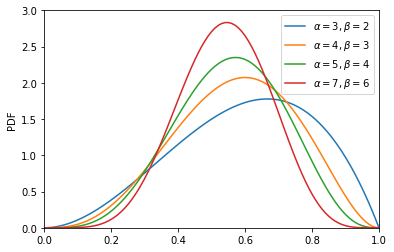

In [5]:
x=np.arange(0,1.01,0.01)
y1 = beta_plot(3,2)
y2 = beta_plot(4,3)
y3 = beta_plot(5,4)
y4 = beta_plot(7,6)
l1, = plt.plot(x, y1, label = 'line')
l2, = plt.plot(x, y2, label = 'line')
l3, = plt.plot(x, y3, label = 'line')
l4, = plt.plot(x, y4, label = 'line')
plt.xlim((0, 1))
plt.ylim((0, 3))
plt.ylabel('PDF')
plt.legend(handles = [l1, l2, l3, l4], labels = [r'$\alpha =3, \beta = 2$', r'$\alpha = 4, \beta = 3$', r'$\alpha = 5,\beta = 4$', r'$\alpha = 7, \beta = 6$'], loc = 'best')
plt.savefig('14.png')
plt.show()

### 1.2 Implement the Thompson update rule and show results

In [6]:
def get_mean(alpha, beta):
    return (alpha/(alpha+beta))
def get_v(alpha, beta):
    return ((alpha*beta)/((alpha+beta)*(alpha+beta)*(alpha+beta+1)))

import random
P = 0.6
R = 1

m_loop = []
v_loop = []
a_loop = []
b_loop = []
alpha = 1
beta = 1

m_loop.append(get_mean(alpha, beta))
v_loop.append(get_v(alpha, beta))
a_loop.append(1)
b_loop.append(1)
for i in range(1000):
    if random.random() < 0.6:
        alpha += R
        beta += 1 - R
    else:
        beta += 1
    m_loop.append(get_mean(alpha, beta))
    v_loop.append(get_v(alpha, beta))
    if i % 40 == 0:
        a_loop.append(alpha)
        b_loop.append(beta)

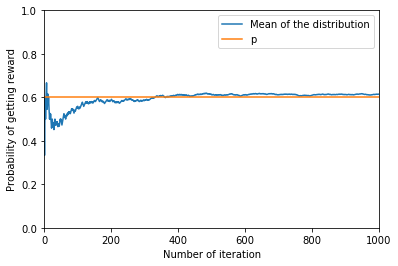

In [7]:
plt.plot(m_loop, label = 'Mean of the distribution')
plt.plot([P]*len(m_loop), label = 'p')
plt.xlabel('Number of iteration')
plt.ylabel('Probability of getting reward')
plt.xlim((0, 1000))
plt.ylim((0, 1))
plt.legend()
plt.savefig('tsm.png')
plt.show()

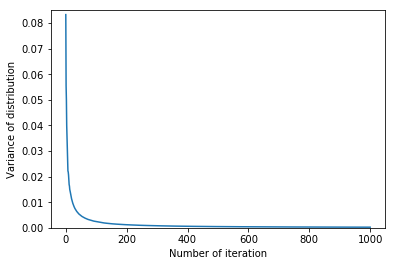

In [8]:
plt.plot(v_loop)
plt.xlabel('Number of iteration')
plt.ylabel('Variance of distribution')
#plt.xlim((0, 1000))
plt.ylim((0, 0.085))
plt.savefig('tsv.png')
plt.show()

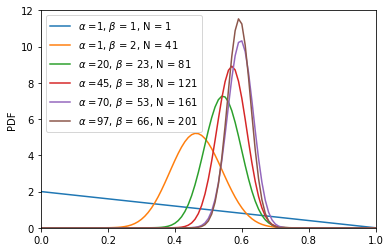

In [9]:
x=np.arange(0,1.01,0.01)
y = []
N = 7
l=list(range(N))
for i in range(1,N):
    y.append(beta_plot(a_loop[i],b_loop[i]))
for i in range(N-1):
    l[i], = plt.plot(x, y[i], label = r'$\alpha$ =%s, $\beta$ = %s, N = %s' %(a_loop[i],b_loop[i],i*40+1))

plt.xlim((0, 1))
plt.ylim((0, 12))
plt.ylabel('PDF')
plt.legend()
plt.savefig('15.png')
plt.show()

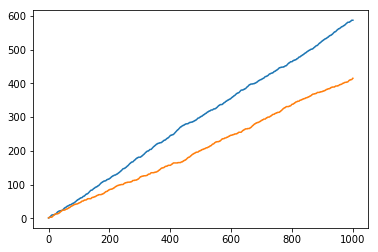

In [10]:
m_loop = []
v_loop = []
a_loop = []
b_loop = []
alpha = 1
beta = 1

m_loop.append(get_mean(alpha, beta))
v_loop.append(get_v(alpha, beta))
a_loop.append(1)
b_loop.append(1)
for i in range(1000):
    if random.random() < 0.6:
        alpha += R
        beta += 1 - R
    else:
        beta += 1
    m_loop.append(get_mean(alpha, beta))
    v_loop.append(get_v(alpha, beta))
    
    a_loop.append(alpha)
    b_loop.append(beta)
plt.plot(a_loop)
plt.plot(b_loop)
plt.show()

### 1.2 Thompson sampling (TS)

In [11]:
P1 = 0.6
P2 = 0.3
R = 1

m1_loop = []
v1_loop = []
a1_loop = []
b1_loop = []
alpha1 = 1
beta1 = 1

m2_loop = []
v2_loop = []
a2_loop = []
b2_loop = []
alpha2 = 1
beta2 = 1
c1 = 0
c2 = 0
c1_loop = []

m1_loop.append(get_mean(alpha1, beta1))
v1_loop.append(get_v(alpha1, beta1))
a1_loop.append(1)
b1_loop.append(1)
m2_loop.append(get_mean(alpha2, beta2))
v2_loop.append(get_v(alpha2, beta2))
a2_loop.append(1)
b2_loop.append(1)
for i in range(1000):
    u1 = np.random.beta(alpha1,beta1)
    u2 = np.random.beta(alpha2,beta2)
    if u1 > u2:
        c1 += 1
        if random.random() < P1:
            alpha1 += R
            beta1 += 1 - R
        else:
            beta1 += 1            
    else:
        c2 += 1
        if random.random() < P2:
            alpha2 += R
            beta2 += 1 - R
        else:
            beta2 += 1
    c1_loop.append(c1/(c1+c2))
    m1_loop.append(get_mean(alpha1, beta1))
    v1_loop.append(get_v(alpha1, beta1))
    m2_loop.append(get_mean(alpha2, beta2))
    v2_loop.append(get_v(alpha2, beta2))
    if i % 40 == 0:
        a1_loop.append(alpha1)
        b1_loop.append(beta1)
        a2_loop.append(alpha2)
        b2_loop.append(beta2)

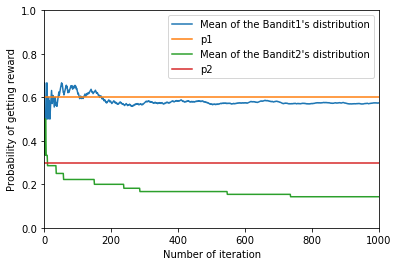

In [12]:
plt.plot(m1_loop, label = 'Mean of the Bandit1\'s distribution')
plt.plot([P1]*len(m1_loop), label = 'p1')
plt.plot(m2_loop, label = 'Mean of the Bandit2\'s distribution')
plt.plot([P2]*len(m2_loop), label = 'p2')
plt.xlabel('Number of iteration')
plt.ylabel('Probability of getting reward')
plt.xlim((0, 1000))
plt.ylim((0, 1))
plt.legend()
plt.savefig('tsm1.png')
plt.show()

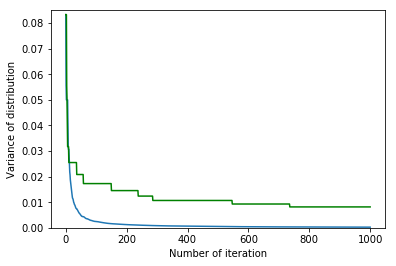

In [13]:
plt.plot(v1_loop)
plt.plot(v2_loop,'g')
plt.xlabel('Number of iteration')
plt.ylabel('Variance of distribution')
#plt.xlim((0, 1000))
plt.ylim((0, 0.085))
plt.savefig('tsv1.png')
plt.show()

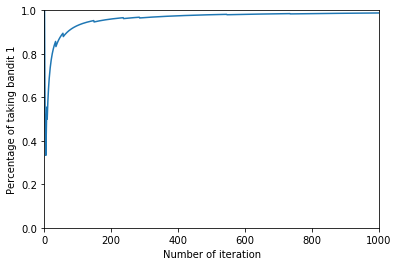

In [14]:
plt.plot(c1_loop)
plt.xlabel('Number of iteration')
plt.ylabel('Percentage of taking bandit 1')
plt.xlim((0, 1000))
plt.ylim((0, 1))
plt.savefig('per.png')
plt.show()

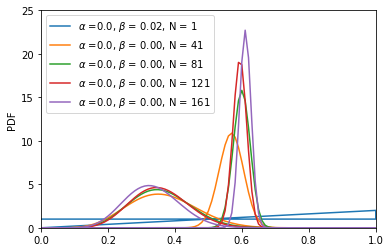

In [15]:
P1 = 0.6
P2 = 0.3
R = 1

m1_loop = []
v1_loop = []
a1_loop = []
b1_loop = []
alpha1 = 1
beta1 = 1

m2_loop = []
v2_loop = []
a2_loop = []
b2_loop = []
alpha2 = 1
beta2 = 1
c1 = 0
c2 = 0
c1_loop = []

m1_loop.append(get_mean(alpha1, beta1))
v1_loop.append(get_v(alpha1, beta1))
m2_loop.append(get_mean(alpha2, beta2))
v2_loop.append(get_v(alpha2, beta2))
for i in range(1000):
    u1 = np.random.beta(alpha1,beta1)
    u2 = np.random.beta(alpha2,beta2)
    if u1 > u2:
        c1 += 1
        if random.random() < P1:
            alpha1 += R
            beta1 += 1 - R
        else:
            beta1 += 1            
    else:
        c2 += 1
        if random.random() < P2:
            alpha2 += R
            beta2 += 1 - R
        else:
            beta2 += 1
    c1_loop.append(c1/(c1+c2))
    m1_loop.append(get_mean(alpha1, beta1))
    v1_loop.append(get_v(alpha1, beta1))
    m2_loop.append(get_mean(alpha2, beta2))
    v2_loop.append(get_v(alpha2, beta2))
    if i % 200 == 0:
        a1_loop.append(alpha1)
        b1_loop.append(beta1)
        a2_loop.append(alpha2)
        b2_loop.append(beta2)

x1=np.arange(0,1.01,0.01)
x2 = np.arange(1,-0.01,-0.01)
y1 = []
y2 = []
N = 5
l1=list(range(N))
l2=list(range(N))

for i in range(N):
    y1.append(np.asarray(beta_plot(a1_loop[i],b1_loop[i])))
    ly2 = beta_plot(a2_loop[i],b2_loop[i])
    ly2r = [0]*len(ly2)
    for j in range(len(ly2)):
        ly2r[j] = ly2[len(ly2)-1-j]
    y2.append(np.asarray(ly2r))
for i in range(N):
    l1[i], = plt.plot(np.append(x1,x2), np.append(y1[i],y2[i]), label = r'$\alpha$ =%.1f, $\beta$ = %.2f, N = %s' %(y1[i][0],y1[i][1],i*40+1))
    #l2[i], = plt.plot(x, y2[i], label = r'$\alpha$ =%.1f, $\beta$ = %.2f, N = %s' %(y2[i][0],y2[i][1],i*40+1))
    
plt.xlim((0, 1))
plt.ylim((0, 25))
plt.ylabel('PDF')
plt.legend()
plt.savefig('16.png')
plt.show()

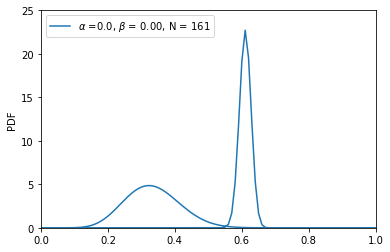

In [16]:
i = 4
y1.append(np.asarray(beta_plot(a1_loop[i],b1_loop[i])))
ly2 = beta_plot(a2_loop[i],b2_loop[i])
ly2r = [0]*len(ly2)
for j in range(len(ly2)):
    ly2r[j] = ly2[len(ly2)-1-j]
y2.append(np.asarray(ly2r))
l1[i], = plt.plot(np.append(x1,x2), np.append(y1[i],y2[i]), label = r'$\alpha$ =%.1f, $\beta$ = %.2f, N = %s' %(y1[i][0],y1[i][1],i*40+1))
#l2[i], = plt.plot(x, y2[i], label = r'$\alpha$ =%.1f, $\beta$ = %.2f, N = %s' %(y2[i][0],y2[i][1],i*40+1))
    
plt.xlim((0, 1))
plt.ylim((0, 25))
plt.ylabel('PDF')
plt.legend()
plt.show()

In [17]:
x1=np.arange(0,1.01,0.01)
x2 = np.arange(1,-0.01,-0.01)

In [18]:
ly2 = beta_plot(a2_loop[i],b2_loop[i])
ly2r = [0]*len(ly2)
for j in range(len(ly2)):
    ly2r[j] = ly2[len(ly2)-1-j]

In [19]:
## Q2

In [20]:
def reward_ts(P1,P2,N):
    reward_ts = []
    reward = 0
    alpha1 = 1
    beta1 = 1
    alpha2 = 1
    beta2 = 1
    c1 = 0
    c2 = 0
    c1_percentage = []

    for i in range(N):
        u1 = np.random.beta(alpha1,beta1)
        u2 = np.random.beta(alpha2,beta2)
        if u1 > u2:
            c1 += 1
            if random.random() < P1:
                reward += 1
                alpha1 += 1
            else:
                beta1 += 1 
        else:
            c2 += 1
            if random.random() < P2:
                reward += 1
                alpha2 += 1
            else:
                beta2 += 1
        reward_ts.append(reward)
        c1_percentage.append(c1*100/(c1+c2))
    return [reward_ts, c1_percentage]

In [21]:
def reward_e(P1,P2,N,e):
    reward_e = []
    reward = 0
    mean1 = 0
    r1_sum = 0
    r2_sum = 0
    mean2 = 0
    c1 = 0
    c2 = 0
    c1_percentage = []


    for i in range(N):
        if random.random() > e:
            if mean1 >= mean2: # bandit 1
                c1 += 1
                if random.random() < P1:
                    reward += 1
                    r1_sum += 1
                mean1 = r1_sum / c1
            else: # bandit 2
                c2 += 1
                if random.random() < P2:
                    reward += 1
                    r2_sum += 1
                mean2 = r2_sum / c2
        else:
            if random.random() >= 0.5: # bandit 1
                c1 += 1
                if random.random() < P1:
                    reward += 1
                    r1_sum += 1
                mean1 = r1_sum / c1
            else: # bandit 2
                c2 += 1
                if random.random() < P2:
                    reward += 1
                    r2_sum += 1
                mean2 = r2_sum / c2
        reward_e.append(reward)
        c1_percentage.append(c1*100/(c1+c2))
    return [reward_e, c1_percentage]

In [22]:
def reward_ucb(P1,P2,N):
    reward_ucb = []
    reward = 0
    mean1 = 0
    r1_sum = 0
    r2_sum = 0
    mean2 = 0
    c1 = 0
    c2 = 0
    c1_percentage = []

    for i in range(N):
        ucb1 = mean1 + np.sqrt((2*np.log(i+1))/(c1+1))
        ucb2 = mean2 + np.sqrt((2*np.log(i+1))/(c2+1))
        if ucb1 > ucb2: # bandit 1
            c1 += 1
            if random.random() < P1:
                reward += 1
                r1_sum += 1
            mean1 = r1_sum / c1
        else: # bandit 2
            c2 += 1
            if random.random() < P2:
                reward += 1
                r2_sum += 1
            mean2 = r2_sum / c2
        reward_ucb.append(reward)
        c1_percentage.append(c1*100/(c1+c2))
    return [reward_ucb, c1_percentage]

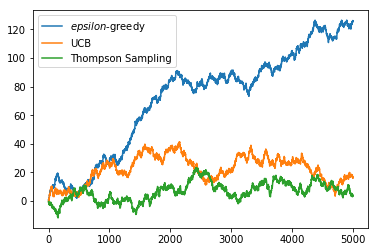

In [23]:
P1 = 0.6
P2 = 0.3
R = 1
N = 5000
e = 0.1

TE = np.arange(P1,P1*(N+1), P1)


[r_ucb, c1_ucb] = reward_ucb(P1,P2,N) 
[r_ts,c1_ts] = reward_ts(P1,P2,N)
[r_e,c1_e] = reward_e(P1,P2,N,e)

r_ucb = TE - r_ucb
r_ts = TE - r_ts
r_e = TE - r_e 

plt.plot(r_e, label = r'$epsilon$-greedy')
plt.plot(r_ucb, label = 'UCB')
plt.plot(r_ts, label = 'Thompson Sampling')
plt.legend()
plt.show()

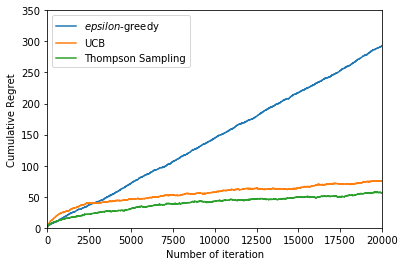

In [24]:
N = 20000
TE = np.arange(P1,P1*(N+1), P1)

list_r_ucb = []
list_r_ts =[]
list_r_e =[]
list_c1_ucb = []
list_c1_ts = []
list_c1_e = []

for i in range(100):
    [r_ucb,c1_ucb] = reward_ucb(P1,P2,N) 
    [r_ts,c1_ts] = reward_ts(P1,P2,N)
    [r_e,c1_e] = reward_e(P1,P2,N,e)

    list_r_ucb.append(TE - r_ucb)
    list_r_ts.append(TE - r_ts)
    list_r_e.append(TE - r_e)
    
    list_c1_ucb.append(c1_ucb)
    list_c1_ts.append(c1_ts)
    list_c1_e.append(c1_e)
    
r_ucb = np.mean(np.absolute(np.array(list_r_ucb)), axis=0, keepdims=True)
r_ts = np.mean(np.absolute(np.array(list_r_ts)), axis=0, keepdims=True)
r_e =np.mean(np.absolute(np.array(list_r_e)), axis=0, keepdims=True)
plt.plot(list(r_e[0]), label = r'$epsilon$-greedy')
plt.plot(list(r_ucb[0]), label = 'UCB')
plt.plot(list(r_ts[0]), label = 'Thompson Sampling')
plt.xlim((0, 20000))
plt.ylim((0, 350))
plt.xlabel('Number of iteration')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.savefig('CR20000.png')
plt.show()

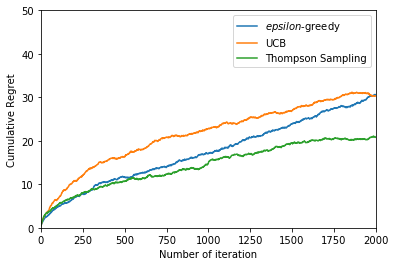

In [25]:
N = 2000
TE = np.arange(P1,P1*(N+1), P1)

list_r_ucb = []
list_r_ts =[]
list_r_e =[]
list_c1_ucb = []
list_c1_ts = []
list_c1_e = []

for i in range(100):
    [r_ucb,c1_ucb] = reward_ucb(P1,P2,N) 
    [r_ts,c1_ts] = reward_ts(P1,P2,N)
    [r_e,c1_e] = reward_e(P1,P2,N,e)

    list_r_ucb.append(TE - r_ucb)
    list_r_ts.append(TE - r_ts)
    list_r_e.append(TE - r_e)
    
    list_c1_ucb.append(c1_ucb)
    list_c1_ts.append(c1_ts)
    list_c1_e.append(c1_e)
    
r_ucb = np.mean(np.absolute(np.array(list_r_ucb)), axis=0, keepdims=True)
r_ts = np.mean(np.absolute(np.array(list_r_ts)), axis=0, keepdims=True)
r_e =np.mean(np.absolute(np.array(list_r_e)), axis=0, keepdims=True)
plt.plot(list(r_e[0]), label = r'$epsilon$-greedy')
plt.plot(list(r_ucb[0]), label = 'UCB')
plt.plot(list(r_ts[0]), label = 'Thompson Sampling')
plt.xlim((0, 2000))
plt.ylim((0, 50))
plt.xlabel('Number of iteration')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.savefig('CR2000.png')
plt.show()

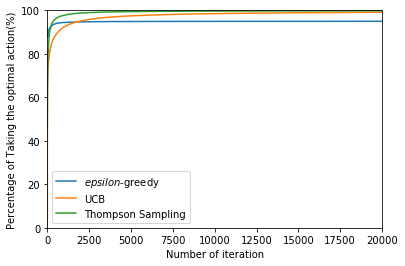

In [26]:
N = 20000

list_c1_ucb = []
list_c1_ts = []
list_c1_e = []

for i in range(100):
    [r_ucb,c1_ucb] = reward_ucb(P1,P2,N) 
    [r_ts,c1_ts] = reward_ts(P1,P2,N)
    [r_e,c1_e] = reward_e(P1,P2,N,e)
 
    list_c1_ucb.append(c1_ucb)
    list_c1_ts.append(c1_ts)
    list_c1_e.append(c1_e)

c_ucb = np.mean(np.absolute(np.array(list_c1_ucb)), axis=0, keepdims=True)
c_ts = np.mean(np.absolute(np.array(list_c1_ts)), axis=0, keepdims=True)
c_e =np.mean(np.absolute(np.array(list_c1_e)), axis=0, keepdims=True)
plt.plot(list(c_e[0]), label = r'$epsilon$-greedy')
plt.plot(list(c_ucb[0]), label = 'UCB')
plt.plot(list(c_ts[0]), label = 'Thompson Sampling')
plt.legend()
plt.xlim((0, 20000))
plt.ylim((0, 100))
plt.xlabel('Number of iteration')
plt.ylabel('Percentage of Taking the optimal action(%)')
plt.savefig('P20000.png')
plt.show()

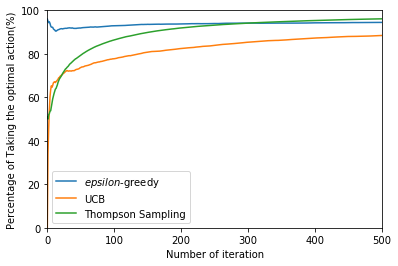

In [27]:
N = 500

list_c1_ucb = []
list_c1_ts = []
list_c1_e = []

for i in range(100):
    [r_ucb,c1_ucb] = reward_ucb(P1,P2,N) 
    [r_ts,c1_ts] = reward_ts(P1,P2,N)
    [r_e,c1_e] = reward_e(P1,P2,N,e)
 
    list_c1_ucb.append(c1_ucb)
    list_c1_ts.append(c1_ts)
    list_c1_e.append(c1_e)

c_ucb = np.mean(np.absolute(np.array(list_c1_ucb)), axis=0, keepdims=True)
c_ts = np.mean(np.absolute(np.array(list_c1_ts)), axis=0, keepdims=True)
c_e =np.mean(np.absolute(np.array(list_c1_e)), axis=0, keepdims=True)
plt.plot(list(c_e[0]), label = r'$epsilon$-greedy')
plt.plot(list(c_ucb[0]), label = 'UCB')
plt.plot(list(c_ts[0]), label = 'Thompson Sampling')
plt.legend()
plt.xlim((0, 500))
plt.ylim((0, 100))
plt.xlabel('Number of iteration')
plt.ylabel('Percentage of Taking the optimal action(%)')
plt.savefig('P500.png')
plt.show()

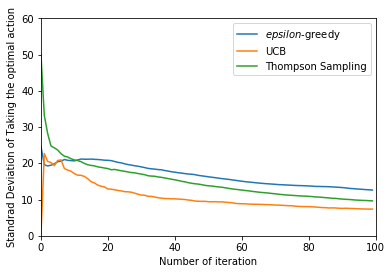

In [28]:
N = 100

list_c1_ucb = []
list_c1_ts = []
list_c1_e = []

for i in range(200):
    [r_ucb,c1_ucb] = reward_ucb(P1,P2,N) 
    [r_ts,c1_ts] = reward_ts(P1,P2,N)
    [r_e,c1_e] = reward_e(P1,P2,N,e)
 
    list_c1_ucb.append(c1_ucb)
    list_c1_ts.append(c1_ts)
    list_c1_e.append(c1_e)

c_ucb = np.std(np.array(list_c1_ucb), axis=0, keepdims=True)
c_ts = np.std(np.array(list_c1_ts), axis=0, keepdims=True)
c_e =np.std(np.array(list_c1_e), axis=0, keepdims=True)
plt.plot(list(c_e[0]), label = r'$epsilon$-greedy')
plt.plot(list(c_ucb[0]), label = 'UCB')
plt.plot(list(c_ts[0]), label = 'Thompson Sampling')
plt.legend()
plt.xlim((0, 100))
plt.ylim((0, 60))
plt.xlabel('Number of iteration')
plt.ylabel('Standrad Deviation of Taking the optimal action')
plt.savefig('S100.png')
plt.show()

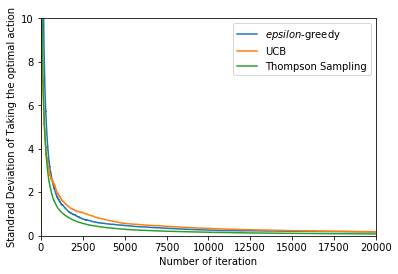

In [29]:
N = 20000

list_c1_ucb = []
list_c1_ts = []
list_c1_e = []

for i in range(100):
    [r_ucb,c1_ucb] = reward_ucb(P1,P2,N) 
    [r_ts,c1_ts] = reward_ts(P1,P2,N)
    [r_e,c1_e] = reward_e(P1,P2,N,e)
 
    list_c1_ucb.append(c1_ucb)
    list_c1_ts.append(c1_ts)
    list_c1_e.append(c1_e)

c_ucb = np.std(np.array(list_c1_ucb), axis=0, keepdims=True)
c_ts = np.std(np.array(list_c1_ts), axis=0, keepdims=True)
c_e =np.std(np.array(list_c1_e), axis=0, keepdims=True)
plt.plot(list(c_e[0]), label = r'$epsilon$-greedy')
plt.plot(list(c_ucb[0]), label = 'UCB')
plt.plot(list(c_ts[0]), label = 'Thompson Sampling')
plt.legend()
plt.xlim((0, 20000))
plt.ylim((0, 10))
plt.xlabel('Number of iteration')
plt.ylabel('Standrad Deviation of Taking the optimal action')
plt.savefig('S20000.png')
plt.show()

In [30]:
def reward_ts(P1,P2,N):
    reward_ts = []
    reward = 0
    alpha1 = 1
    beta1 = 1
    alpha2 = 1
    beta2 = 1
    c1 = 0
    c2 = 0
    u = []

    for i in range(N):
        u1 = np.random.beta(alpha1,beta1)
        u2 = np.random.beta(alpha2,beta2)
        if u1 > u2:
            c1 += 1
            u.append(1)
            if random.random() < P1:
                reward += 1
                alpha1 += 1
            else:
                beta1 += 1 
        else:
            c2 += 1
            u.append(0)
            if random.random() < P2:
                reward += 1
                alpha2 += 1
            else:
                beta2 += 1
        reward_ts.append(reward)
    return [reward_ts, u]


def reward_e(P1,P2,N,e):
    reward_e = []
    reward = 0
    mean1 = 0
    r1_sum = 0
    r2_sum = 0
    mean2 = 0
    c1 = 0
    c2 = 0
    u = []


    for i in range(N):
        if random.random() > e:
            if mean1 >= mean2: # bandit 1
                c1 += 1
                u.append(1)
                if random.random() < P1:
                    reward += 1
                    r1_sum += 1
                mean1 = r1_sum / c1
            else: # bandit 2
                c2 += 1
                u.append(0)
                if random.random() < P2:
                    reward += 1
                    r2_sum += 1
                mean2 = r2_sum / c2
        else:
            if random.random() >= 0.5: # bandit 1
                c1 += 1
                u.append(1)
                if random.random() < P1:
                    reward += 1
                    r1_sum += 1
                mean1 = r1_sum / c1
            else: # bandit 2
                c2 += 1
                u.append(0)
                if random.random() < P2:
                    reward += 1
                    r2_sum += 1
                mean2 = r2_sum / c2
        reward_e.append(reward)
    return [reward_e, u]

def reward_ucb(P1,P2,N):
    reward_ucb = []
    reward = 0
    mean1 = 0
    r1_sum = 0
    r2_sum = 0
    mean2 = 0
    c1 = 0
    c2 = 0
    u = []

    for i in range(N):
        ucb1 = mean1 + np.sqrt((2*np.log(i+1))/(c1+1))
        ucb2 = mean2 + np.sqrt((2*np.log(i+1))/(c2+1))
        if ucb1 > ucb2: # bandit 1
            u.append(1)
            c1 += 1
            if random.random() < P1:
                reward += 1
                r1_sum += 1
            mean1 = r1_sum / c1
        else: # bandit 2
            c2 += 1
            u.append(0)
            if random.random() < P2:
                reward += 1
                r2_sum += 1
            mean2 = r2_sum / c2
        reward_ucb.append(reward)
    return [reward_ucb, u]

In [31]:
N = 20000

list_u_ucb = []
list_u_ts = []
list_u_e = []

for i in range(100):
    [r_ucb,u_ucb] = reward_ucb(P1,P2,N) 
    [r_ts,u_ts] = reward_ts(P1,P2,N)
    [r_e,u_e] = reward_e(P1,P2,N,e)
 
    list_u_ucb.append(u_ucb)
    list_u_ts.append(u_ts)
    list_u_e.append(u_e)

u_ucb = np.std(np.array(list_u_ucb), axis=0, keepdims=True)
u_ts = np.std(np.array(list_u_ts), axis=0, keepdims=True)
u_e =np.std(np.array(list_u_e), axis=0, keepdims=True)

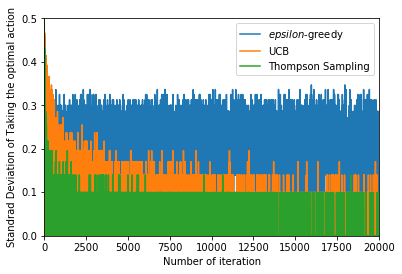

In [32]:
plt.plot(list(u_e[0]), label = r'$epsilon$-greedy')
plt.plot(list(u_ucb[0]), label = 'UCB')
plt.plot(list(u_ts[0]), label = 'Thompson Sampling')
plt.legend()
plt.xlim((0, 20000))
plt.ylim((0, 0.5))
plt.xlabel('Number of iteration')
plt.ylabel('Standrad Deviation of Taking the optimal action')
plt.savefig('SA20000.png')
plt.show()

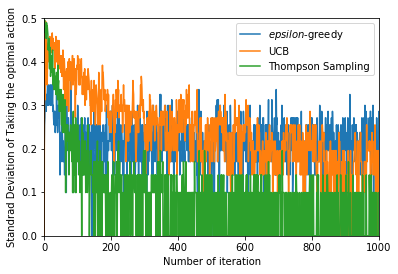

In [33]:
plt.plot(list(u_e[0]), label = r'$epsilon$-greedy')
plt.plot(list(u_ucb[0]), label = 'UCB')
plt.plot(list(u_ts[0]), label = 'Thompson Sampling')
plt.legend()
plt.xlim((0, 1000))
plt.ylim((0, 0.5))
plt.xlabel('Number of iteration')
plt.ylabel('Standrad Deviation of Taking the optimal action')
plt.savefig('SA1000.png')
plt.show()